# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Aluno**: Eduardo Garcia do Nascimento

**RA/CPF**: 22008732800


---
### Carregamento dos dados

Nesta seção é feita a carga dos atributos em um dataframe só, ou seja, os três datasets são lidos e concatenados para que a redução de atributos leve em conta o que existe de melhor em todos eles.


In [50]:
# -*- coding: utf-8 -*-

# Caminho dos arquivos
FILES_DIRECTORY = "data"

import numpy as np 
import pandas as pd 
import os
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from scripts import utils

if __name__ == '__main__':
                       
    # importa o arquivo e guarda em um dataframe do Pandas
    set1_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'set1.csv'), sep=',', low_memory=False)
    set2_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'set2.csv'), sep=',', low_memory=False) 
    set3_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'set3.csv'), sep=',', low_memory=False)
    train_dataset = pd.read_csv(os.path.join(FILES_DIRECTORY, 'train.csv'), sep=',')
    test_dataset  = pd.read_csv(os.path.join(FILES_DIRECTORY, 'test.csv'), sep=',')
    
    # Renomeia colunas concatenando o setX antes de fazer o merge para identificá-las posteriormente
    cols = set1_dataset.columns
    for col in cols:
        set1_dataset = set1_dataset.rename(columns={col:'set1_'+col})
        
    cols = set2_dataset.columns
    for col in cols:
        set2_dataset = set2_dataset.rename(columns={col:'set2_'+col})
    
    cols = set3_dataset.columns
    for col in cols:
        set3_dataset = set3_dataset.rename(columns={col:'set3_'+col})

    # Concatena os datasets em somente um dataset único
    frames = [ set3_dataset ]
    input_dataset = pd.concat(frames, axis=1)
    
    print('A base de dados inicial combinada tem %d amostras com %d atributos' % (input_dataset.shape[0],
                                                                                 input_dataset.shape[1]))
    
        
   
    utils.beep(1, 400)

A base de dados inicial combinada tem 60842 amostras com 149 atributos


---
### Pré-processamento e seleção de atributos

Nesta seção são feitas limpezas da base de dados como:

* Remoção de atributos sem variância;
* Tratamento de outliers e dados nulos;
* Seleção dos atributos que terão maior valor para o algoritmo de classificação.

In [51]:
# Remove os atributos que são constantes e não oferecem nenhum valor aos algoritmos de classificação
variance_mask = VarianceThreshold().fit(input_dataset).get_support()
input_dataset = input_dataset.iloc[:,variance_mask]
print('Atributos removidos por baixa variância: %d' % np.sum(~variance_mask))

# Tratamento de outliers e entradas nulas
df = input_dataset.copy()
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
print("Número de outliers substituídos por valores nulos:", np.sum(np.sum(mask)))
df[mask] = np.nan
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
input_dataset.loc[:,:] = imp_mean.fit_transform(input_dataset)

# Normalização dos dados entre 0 e 1
input_dataset.loc[:,:] = MinMaxScaler().fit_transform(input_dataset)

# Adiciona as classes junto ao dataset de atributos para fazer a seleção de atributos
input_dataset['classe'] = np.nan
input_dataset.loc[train_dataset['Id'].values,'classe'] = train_dataset['Class'].values

backup_dataset = input_dataset.copy()

mask = ((input_dataset['classe'] == -1) | (input_dataset['classe'] == 1))

cols = list(input_dataset.columns)
cols.remove('classe')

# Seleciona os melhores atritubos para treinametno do algoritmo de classificação
print('Selecionando melhores features....................................')
selector = SelectKBest(f_classif, k=6).fit(
    input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1), cols].values,
    input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1),'classe'].values)
mask = selector.get_support()
mask = np.append(mask, True)
input_dataset = input_dataset.iloc[:,mask]

display(input_dataset.head(10))
display(input_dataset.describe())

utils.beep(1, 500)

Atributos removidos por baixa variância: 1
Número de outliers substituídos por valores nulos: 647898
Selecionando melhores features....................................


,set3_D0022,set3_D0030,set3_D0031,set3_D0032,set3_D0033,set3_D0118,classe
0,0.928441,0.809993,0.809993,0.643518,0.685781,0.996289,NaN
1,0.938647,0.810898,0.810225,0.618624,0.681894,0.995425,NaN
2,0.946896,0.810013,0.810013,0.624315,0.668855,0.994724,NaN
3,0.929880,0.809994,0.809989,0.634784,0.690639,0.997281,NaN
4,0.925179,0.914191,0.914191,0.750575,0.780145,0.996491,NaN
5,0.881138,0.810019,0.810020,0.643434,0.697006,0.998937,NaN
6,0.891666,0.809984,0.809985,0.633500,0.678901,0.997140,NaN
7,0.910305,0.834905,0.834905,0.651242,0.692589,0.996727,NaN
8,0.928685,0.810030,0.810030,0.636076,0.679221,0.978740,NaN
9,0.927090,0.810326,0.810326,0.622882,0.667591,0.996298,NaN


,set3_D0022,set3_D0030,set3_D0031,set3_D0032,set3_D0033,set3_D0118,classe
count,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,60842.000000,4564.000000
mean,0.731812,0.819833,0.818717,0.629680,0.679997,0.991490,-0.825153
std,0.370996,0.033289,0.032303,0.080392,0.057838,0.011672,0.513349
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.879055,0.810009,0.810007,0.624195,0.670595,0.991494,-1.000000
50%,0.917798,0.810210,0.810119,0.633760,0.680102,0.995189,-1.000000
75%,0.931206,0.814914,0.813696,0.646407,0.692817,0.996796,-1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---
### Análise exploratória

Nesta seção são exibidas informações do resultado após os dados serem pré-processados e os atributos selecionados. Dentre as ferramentas para análise exploratória que serão utilizados estão:

* Descritivo resumido da base.
* Análises de covariância e correlação.
* Matriz de disperação entre todos os atributos selecionados. 
* Diagramas de violino para visualização dos quartis e outliers como uma variação aos diagramas de caixa.
* Gráfico de dispersão com a dimensionalidade reduzida a somente 2 atributos.

Análise e visualização dos dados:
Número de posts comuns: 4038
Número de posts não reconhecidos (podem ser phishing ou não): 272
Número de posts phishing: 254


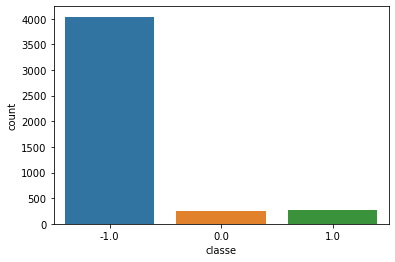

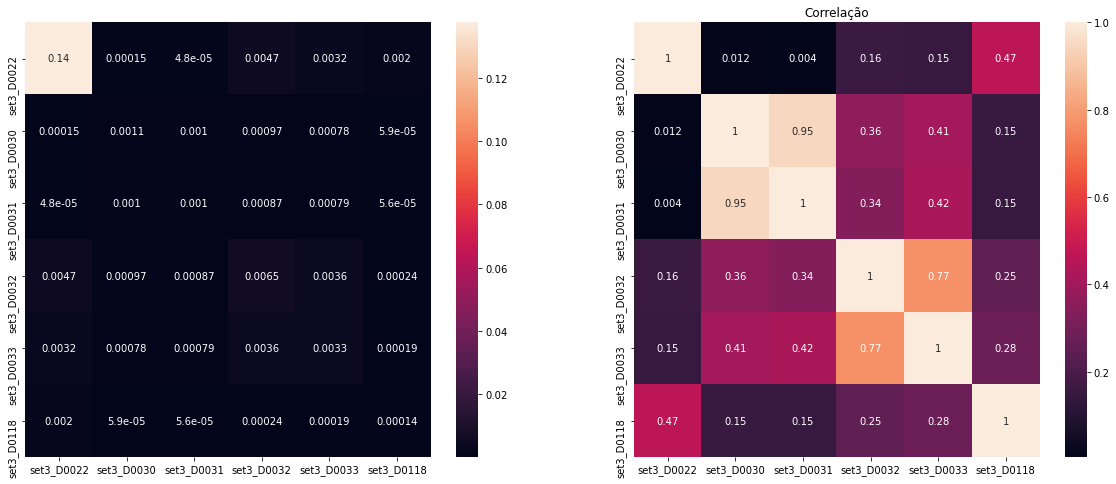

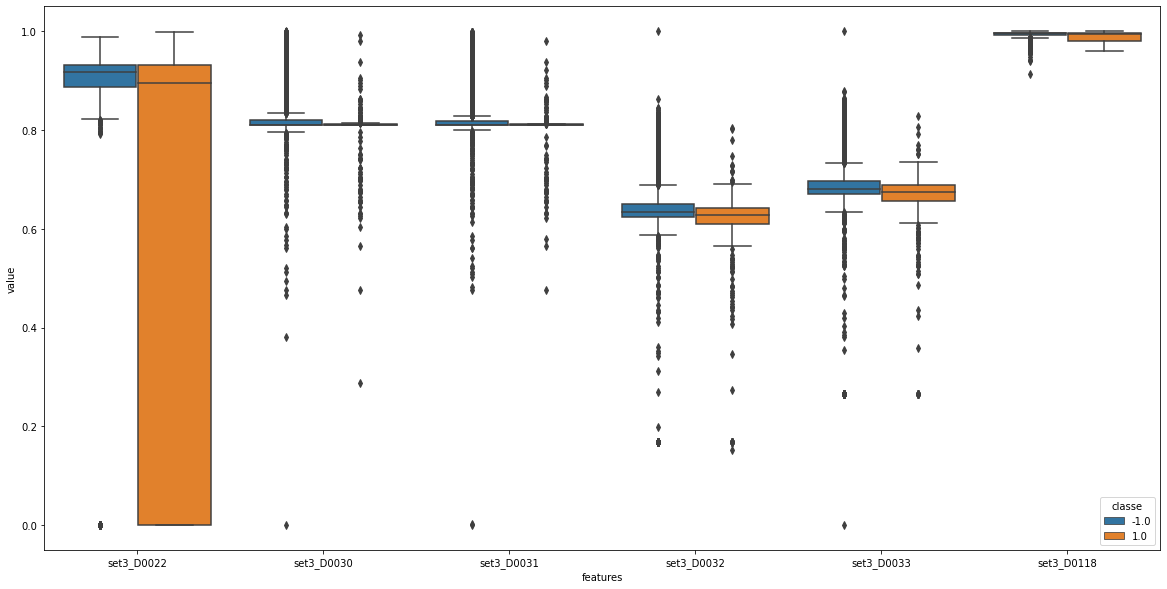

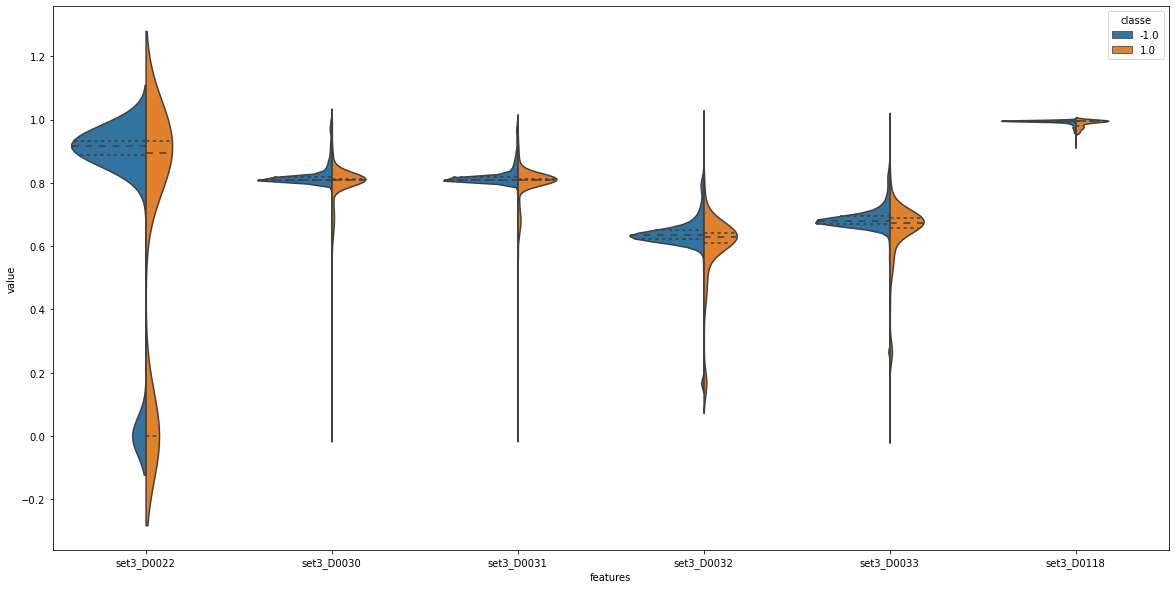

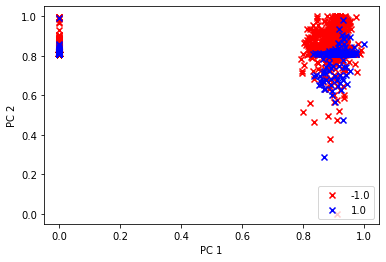

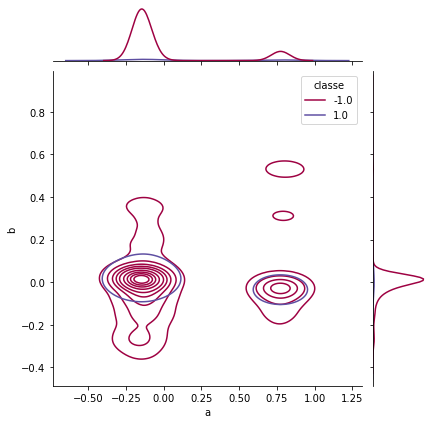

In [52]:
# Análise do balanceamento das classes
print('Análise e visualização dos dados:')
ax = sns.countplot(x='classe', data=input_dataset, label="Contagem")

N,U,P = input_dataset.classe.value_counts()
print('Número de posts comuns:', N)
print('Número de posts não reconhecidos (podem ser phishing ou não):', U)
print('Número de posts phishing:', P)
plt.show()

# matriz de diagramas scatter 
#sns.pairplot(input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)], hue='classe', height=3.5);
#plt.show()

# matrizes de covariancia e correlação
df_covariance = input_dataset.iloc[:,:-1].cov()
df_correlation = input_dataset.iloc[:,:-1].corr()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8))
sns.heatmap(df_covariance, annot=True, xticklabels=df_correlation.columns, yticklabels=df_correlation.columns, ax=ax1)
plt.title('Covariância')
sns.heatmap(df_correlation, annot=True, xticklabels=df_correlation.columns, yticklabels=df_correlation.columns, ax=ax2)
plt.title('Correlação')
plt.show()

K = input_dataset.loc[test_dataset.iloc[:,:].values.T[0]]
K = K.drop('classe', axis=1).values

# Diagramas de caixa
plt.figure(figsize=(20,10))
data = pd.melt(input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)],
               id_vars="classe", var_name="features", value_name='value')
sns.boxplot(x='features', y='value', hue='classe', data=data)
plt.show()

# diagramas de violino
plt.figure(figsize=(20,10))
sns.violinplot(x='features', y='value', hue='classe', data=data, split=True, inner="quartile")
plt.show()

# Separação de atributos e classe para 
utils.printPCA(input_dataset.loc[((input_dataset['classe'] == -1) | (input_dataset['classe'] == 1))].drop('classe', axis=1).values,
               input_dataset.loc[((input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)), 'classe'].values)    

from sklearn.decomposition import PCA
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(input_dataset.loc[((input_dataset['classe'] == -1) | (input_dataset['classe'] == 1))].drop('classe', axis=1).values)

data = pd.DataFrame(data=projected, columns=['a', 'b'])
data['classe'] = input_dataset.loc[((input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)), 'classe'].values

if int(sns.__version__[2:4]) < 11:
    print('Para uma melhor experiência, atualize a seaborn para a versão 11 ou superior')
    sns.jointplot(data=data, x="a", y="b")
else:
    sns.jointplot(data=data, x="a", y="b", kind="kde", palette='Spectral', hue='classe')

utils.beep(1, 600)   

---
### Preparo dos dados e experimentos para encontrar os melhores hiperparâmetros

Nesta seção os dados são separados em duas partes: treino e testes. Esta estratégia foi utilizada para posterior comparação com a validação de modelos utilizandos K-folds.
Para encontrar os melhores hiperparâmetros foi utilizada a classe GridSearchCV e devido o seu alto custo computacional e não existência da necessidade de executá-las sempre, a sua chamada é condicionada às variáveis booleanas evaluate_svm_hiperparameters, evaluate_rfc_hiperparameters e evaluate_lrc_hiperparameters serem verdadeiras.

In [4]:
from sklearn.model_selection import train_test_split
from scripts import utils

X_total = input_dataset.loc[(input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)].drop('classe', axis=1).values
y_total = input_dataset.loc[((input_dataset['classe'] == -1) | (input_dataset['classe'] == 1)), 'classe'].values

# Utilize as flags abaixo somente para avaliação dos hiperparâmetros pois elas demoram muito pra serem executadas
evaluate_svm_hiperparameters = True # Busca os melhores parâmetros para as máquinas de vetores de suporte
evaluate_rfc_hiperparameters = True # Busca os melhores parâmetros para as florestas aleatórias
evaluate_knn_hiperparameters = True # Busca os melhores parâmetros para o KNN

print('Removendo amostras outliers')
X, y = utils.remove_outliers(X_total, y_total)

print(X.shape, y.shape)
print('Separando a base em treino e teste')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0, shuffle=True, stratify=y)

scores = ['balanced_accuracy', 'f1', 'roc_auc']

if evaluate_svm_hiperparameters == True:
    utils.find_best_svm(X,y, scores)
    
if evaluate_rfc_hiperparameters == True:    
    utils.find_best_rfc(X, y, scores)
        
if evaluate_knn_hiperparameters == True:
    utils.find_best_knn(X, y, scores)

utils.beep(1, 700)

Removendo amostras outliers
Amostras =1 mantidas: 244 de 272
Amostras =-1 mantidas: 3663 de 4038
(3907, 6) (3907,)
Separando a base em treino e teste
Buscando os melhores parâmetros para as máquinas de vetores de suporte:


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/en89912/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-ccfe5f637fca>", line 22, in <module>
    utils.find_best_svm(X,y, scores)
  File "/home/en89912/main/scripts/utils.py", line 478, in find_best_svm
    clf.fit(X, y)
  File "/home/en89912/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/home/en89912/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py", line 736, in fit
    self._run_search(evaluate_candidates)
  File "/home/en89912/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py", line 1188, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/home/en89912/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py", line 708, in evaluate_candidates
    o

TypeError: object of type 'NoneType' has no len()

---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais ensinados no curso e executando os métodos inteligentes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.semi_supervised import LabelSpreading
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import resample

X_bal, y_bal = X, y
X_train_bal, y_train_bal = X_train, y_train


scoring=['roc_auc', 'f1', 'f1_micro', 'f1_macro', 'f1_weighted', 'accuracy', 'balanced_accuracy']

results = pd.DataFrame()

model_list = [
    ['SVM poly', svm.SVC(kernel='poly', class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1), 0],
    ['SVM linear', svm.SVC(kernel='linear', C=100, class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1), 0],
    ['SVM rbf', svm.SVC(kernel='rbf', C=1000, gamma=0.0001, class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1), 0],
    ['SVM rbf_ra', svm.SVC(kernel='rbf', C=10, gamma='scale', class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1), 0],
    ['SVM rbf_ba', svm.SVC(kernel='rbf', C=400, gamma='scale', class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1), 0],
    ['SVM rbf_f1', svm.SVC(kernel='rbf', C=600, gamma=0.001, class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1), 0],
    ['Random Forest', RandomForestClassifier(max_depth=2, class_weight='balanced', random_state=1), 0],
    ['Logistic Regression', LogisticRegression(random_state=1, class_weight='balanced', max_iter=15000), 0],
    ['Multinomial NB', MultinomialNB(), 0],
    ['KNN', KNeighborsClassifier(n_neighbors=1, leaf_size=4, weights='distance'), 0],
    ['AdaBoost', AdaBoostClassifier(n_estimators=100, random_state=0), 0],
    ['GradBoost', GradientBoostingClassifier(random_state=0), 0],
    ['KNN3', KNeighborsClassifier(n_neighbors=1, leaf_size=4, weights='distance'), 0],
    ['KNN8', KNeighborsClassifier(n_neighbors=70, leaf_size=1, weights='distance'), 0],
]

# Pré balanceamento dos dados utilizando a técnica de oversampling
X_train_bal, y_train_bal = utils.balance_classes(X_train_bal, y_train_bal)
X_bal, y_bal = utils.balance_classes(X, y)

semi_model = svm.SVC(kernel='poly', class_weight='balanced', decision_function_shape='ovr', probability=True,random_state=1)
 # População dos dados não classificados com o melhor classificador encontrado com os resultados mais confiáveis
if True:
    samples = backup_dataset[(backup_dataset.classe!=-1)&(backup_dataset.classe!=1)&(backup_dataset.classe!=0)].iloc[:,mask].drop('classe', axis=1).values
    X_semi, y_semi, proba_mask = utils.add_samples(semi_model, X_train_bal, y_train_bal, samples)

    print('Número de amostras acrescentadas ao dataset de treinamento:', X_semi.shape[0], 
                                                                          np.sum(y_semi==-1), np.sum(y_semi==1))
    X_train_bal = np.concatenate([X_train_bal, X_semi], axis=0)
    y_train_bal = np.concatenate([y_train_bal, y_semi], axis=0)
    X_bal = np.concatenate([X_bal, X_semi], axis=0)
    y_bal = np.concatenate([y_bal, y_semi], axis=0)

if False:
    X_train_bal, y_train_bal = utils.balance_classes(X_train_bal, y_train_bal)
    X_bal, y_bal = utils.balance_classes(X_bal, y_bal)

    # População dos dados não classificados com o melhor classificador encontrado com os resultados mais confiáveis
    samples = samples[~proba_mask]
    X_semi, y_semi, proba_mask = utils.add_samples(semi_model, X_train_bal, y_train_bal, samples)
    print('Número de amostras acrescentadas ao dataset de treinamento:', X_semi.shape[0], 
                                                                          np.sum(y_semi==-1), np.sum(y_semi==1))
    X_train_bal = np.concatenate([X_train_bal, X_semi], axis=0)
    y_train_bal = np.concatenate([y_train_bal, y_semi], axis=0)
    X_bal = np.concatenate([X_bal, X_semi], axis=0)
    y_bal = np.concatenate([y_bal, y_semi], axis=0)

X_train_bal, y_train_bal = utils.balance_classes(X_train_bal, y_train_bal)
X_bal, y_bal = utils.balance_classes(X_bal, y_bal)

# Configura K folds estratificados, ou seja, mantendo as mesmas proporções entre classes
cv = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)

for model in model_list:
    print(model[0] + '------------------------------------------------------------------------------------')
    y_pred = utils.evaluate_model(model[1], X_train_bal, y_train_bal, X_test, y_test)
    
    cv_results = cross_validate(model[1], X_bal, y_bal, scoring=scoring, return_train_score=True)

    for cv_result in cv_results:
        results.loc[model[0], cv_result] = np.mean(cv_results[cv_result])
    
    results.loc[model[0], 'TN'] = confusion_matrix(y_test, y_pred)[0][0]
    results.loc[model[0], 'TP'] = confusion_matrix(y_test, y_pred)[1][1]


utils.beep(1, 800)

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos e comparados, através de tabelas e gráficos

In [ ]:
display(results)
utils.beep(3, 1000)

---
### Criação do arquivo de sumissão no Kaggle

Na etapa final, o arquivo submission.csv é criado para ser enviado ao Kaggle de acordo com os padrões pré-definidos pela proposta do desafio.

In [ ]:
submit_preference_score = 'GradBoost'

for model in model_list:
    if model[0]==submit_preference_score:
        best_model = model[1]
        best_model_name = model[0]

print('Criando arquivo de submissão para o modelo: ' + submit_preference_score)    
    
    
print('Printing model to submission.csv ###################################################################')
clf= best_model.fit(X_bal, y_bal)
y_pred_submission = clf.predict_proba(K)[:,1]
result = np.zeros((K.shape[0],2))
for i in range(K.shape[0]):
    result[i][0] = test_dataset.iloc[:,:].values.T[0][i]
    result[i][1] = y_pred_submission[i]
resultdf = pd.DataFrame(data=result, columns=["Id", "Predicted"])
resultdf['Id'] = resultdf['Id'].astype(int)
resultdf['Predicted'] = resultdf['Predicted'].round(decimals=5)
resultdf.to_csv('submission.csv', index=False, float_format='%.5f')
print('####################################################################################################')

utils.beep(5, 200)